# Metryka sukcesu (ang. *success metric*)

### Celem jest poznanie metryki sukcesu i jej ważności.

Mapowanie metryki sukcesu z poziomu biznesu (pieniędzy) do metryki sukcesu uczenia maszynowego jest sztuką. W świecie akademickim dość często popełnia się błąd (z punktu widzenia biznesu) poprzez użycie metryki, która niekonieczne koreluje z biznesem.
Metryka ma ogromny wpływ na całość. Jak już ktoś powiedział, **jeśli nie możesz czegoś zmierzyć, nie możesz tego ulepszyć**.

Myśl o metrykach w ten sposób, że istnieją różne ich rodzaje i każda z nich prowadzi do czegoś innego. Zwłaszcza wtedy, kiedy zaczynasz optymalizować coraz bardziej agresywnie. **Pamiętaj**, że uczenie maszynowe właśnie na tym polega — na agresywnej optymalizacji lub inaczej mówiąc - na doborze takich parametrów, aby błąd był jak najmniejszy.

Ważne jest, aby optymalizować taką liczbę, która daje wartość, a nie jest po prostu "fajną" liczbą. W języku angielskim jest takie fajne powiedzenie: **there is a difference between numbers and numbers that matter**.

Dodatkowo, warto zrozumieć jeszcze jedną rzecz. Dość często popełnia się błąd, kiedy próbuje się optymalizować kilka metryk jednocześnie. Prawda jest taka, że w pewnym momencie metryki mogą pokrywać się, ale im bardziej optymalizujemy, tym bliżej jesteśmy punktu, w którym metryki będą sprzeczne. Analogia - w Gdańsku spotykają się dwie osoby, tak się złożyło, że jadą do Krakowa. Na początku wsiadają do tego samego pociągu i jadą wspólnie, ale gdy już będą w Krakowie to każda z nich pojedzie pod inny adres (no, chyba że to mąż i żona :)) Dlatego można patrzeć na kilka metryk, ale królowa powinna być jedna (ta najbardziej korzystna z punktu widzenia praktycznego).

Już kończąc wstęp o metrykach, muszę przypomnieć fajny cytat: "**Essentially, all models are wrong, but some are useful**" (c) [George Box](https://bit.ly/3wlYzjN). Trochę parafrazując - właściwa metryka pomaga Ci osiągnąć cel, ale również będzie miała swoje wady lub ograniczenia (koniecznie trzeba poznać zarówno słabe, jak i mocne strony metryk, których będziesz używać).

In [4]:
#helper - pomocniczy plik, który powstał, żeby zmniejszyć ilość kodu w komórkach
#możesz zobaczyć co tam jest wykonując polecenia: %load helper.py lub %pycat helper.py. Nie martw się, jeśli nie rozumiesz co w tym pliku się dzieje.
import helper as h 
import numpy as np

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

#potrzebny do zrobienia suwaczków (slider)
from IPython.display import display
import ipywidgets as widgets

%matplotlib inline

AttributeError: module 'pandas' has no attribute 'tslib'

## Regresja

Metryki w regresji są bardzo podobne jeśli chodzi o idee. Ze względu na to, że w regresji mamy często wartości ciągłe, nie ma możliwości, aby predykcje (ang. *predicted value*) idealnie pokryły się z wartościami prawdziwymi (ang. *true value*). Dlatego po wykonaniu prognozy liczymy różnicę pomiędzy wartością prawdziwą, a predykcją. 
W ten sposób osiągamy błąd dla jednego punktu. Zwykle mamy więcej niż jeden punkt (np. tysiąc czy milion, liczba punktów równa się liczbie wierszy w zbiorze treningowym), więc trzeba wszystkie te różnice złączyć np. zsumować.

Warto zwrócić uwagę, że gdy odejmujemy wartość prawdziwą od wartości przewidzianej, to zawsze może się pojawić minus. Jeśli nic nie zrobimy z tym minusem, to może wprowadzić w błąd naszą sumę (a tym samym metrykę): np. `-2 + 2 = 0`, czyli pokazuje, że sumarycznie jest błąd zerowy, chociaż tak naprawdę było to coś innego - najpierw model powiedział o 2 mniej, a później o 2 więcej. Trzeba w jakiś sposób pozbyć się minusa. Są na to co najmniej dwie możliwości: obcinamy znak lub podnosimy do kwadratu. Z kolei, jeśli podnosimy do kwadratu przed sumą, to już po tym, jak jest ona wyliczona można wyciągnąć z niej pierwiastek.


#### Najbardziej znane metryki dla regresji:
* [mean squared error](https://bit.ly/3cLF6Bw) (mse)
* [mean absolute error](https://bit.ly/3wkCfXR) (mae)
* [root mean square error](https://bit.ly/3dyARIK)(rmse)
* [root mean square logarithm error](https://bit.ly/2Pt7dwj)(rmsle)
* [R-squared](https://bit.ly/31FyiPl) (R<sup>2</sup>)


*Swoją drogą*, nie musisz rozumieć w tej chwili, w jaki sposób został zrobiony wykres, ważniejsze jest jego zinterpretowanie i wyciągnięcie wniosków.

## Przyjrzymy się dokładniej metrykom sukcesu na konkretnym przykładzie.

Mamy tylko **jeden punkt** (dla uproszczenia, później będzie więcej). Ten punkt równa się 10 (można to zmienić w argumencie funkcji `h.plot_metrics_for_given_point(10)`). Jeśli model "powie" 9 - to oznacza o 1 mniej, 8 o 2 mniej, itd. Podobnie w drugą stronę, jeśli model powie 11 - to jeden więcej, 12 o 2 więcej, itd.

Twoim zadaniem jest lepiej zrozumieć, jak zachowują się metryki sukcesu w tym czy innym przypadku.

*Swoją drogą, w tej chwili nie musisz rozumieć, w jaki sposób został zrobiony wykres, ważniejsze jest jego zinterpretowanie i wyciągnięcie wniosków.*

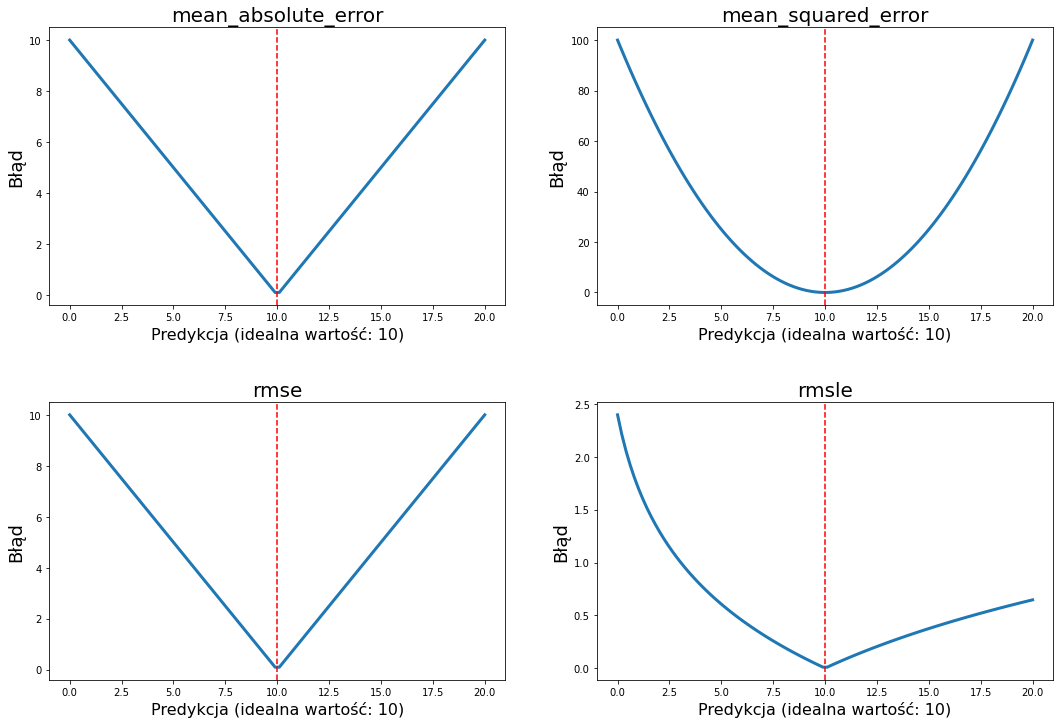

In [3]:
h.plot_metrics_for_given_point(10)

## Zadanie 2.3.3

W odróżnieniu od poprzedniego zadania (gdzie była tylko jedna kropka), tym razem będzie ich 30. Rozważ różne przypadki i jak to wpływa na metryki sukcesu. W poszczególnych punktach wypisałem, co się dzieje z danymi. 

Od Ciebie oczekuję opisania (dla każdego wykresu), co widać na wykresie, jak zachowują się metryki i jak sądzisz - dlaczego właśnie tak?

1. **Wykres #1**. Czerwone i zielone kropki są prawie identyczne (prawie idealny przypadek).
2. **Wykres #2**. Czerwone kropki mają równomierny rozrzut (model myli się podobnie z niedoszacowaniem i przeszacowaniem).
3. **Wykres #3**. Wszystkie czerwone kropki (oprócz jednej, ostatniej) są bardzo bliskie zielonych. Dla ostatniej czerwonej kropki (outlier), model przewidział znacznie więcej niż trzeba.
4. **Wykres #4**. Podobna sytuacja jak w #3, tylko wartość ostatniej kropki jest znacznie mniejsza niż trzeba.
5. **Wykres #5**. Wszystkie przewidziane wartości (czerwone kropki) są większe niż trzeba.
6. **Wykres #6**. Podobna sytuacja jak w #5, tylko wszystkie przewidziane wartości są mniejsze.
7. **Wykres #7**. Podobna sytuacja jak w #2, tylko rozrzut wartości jest większy (od 200 do 1800).
8. **Wykres #8**. Czerwone kropki mają tę samą wartość i to jest wartość średnia zielonych kropek.

*Swoją drogą*, w tej chwili nie musisz rozumieć, w jaki sposób został zrobiony wykres, ważniejsze jest zinterpretowanie wykresów i wyciągnięcie z nich wniosków.

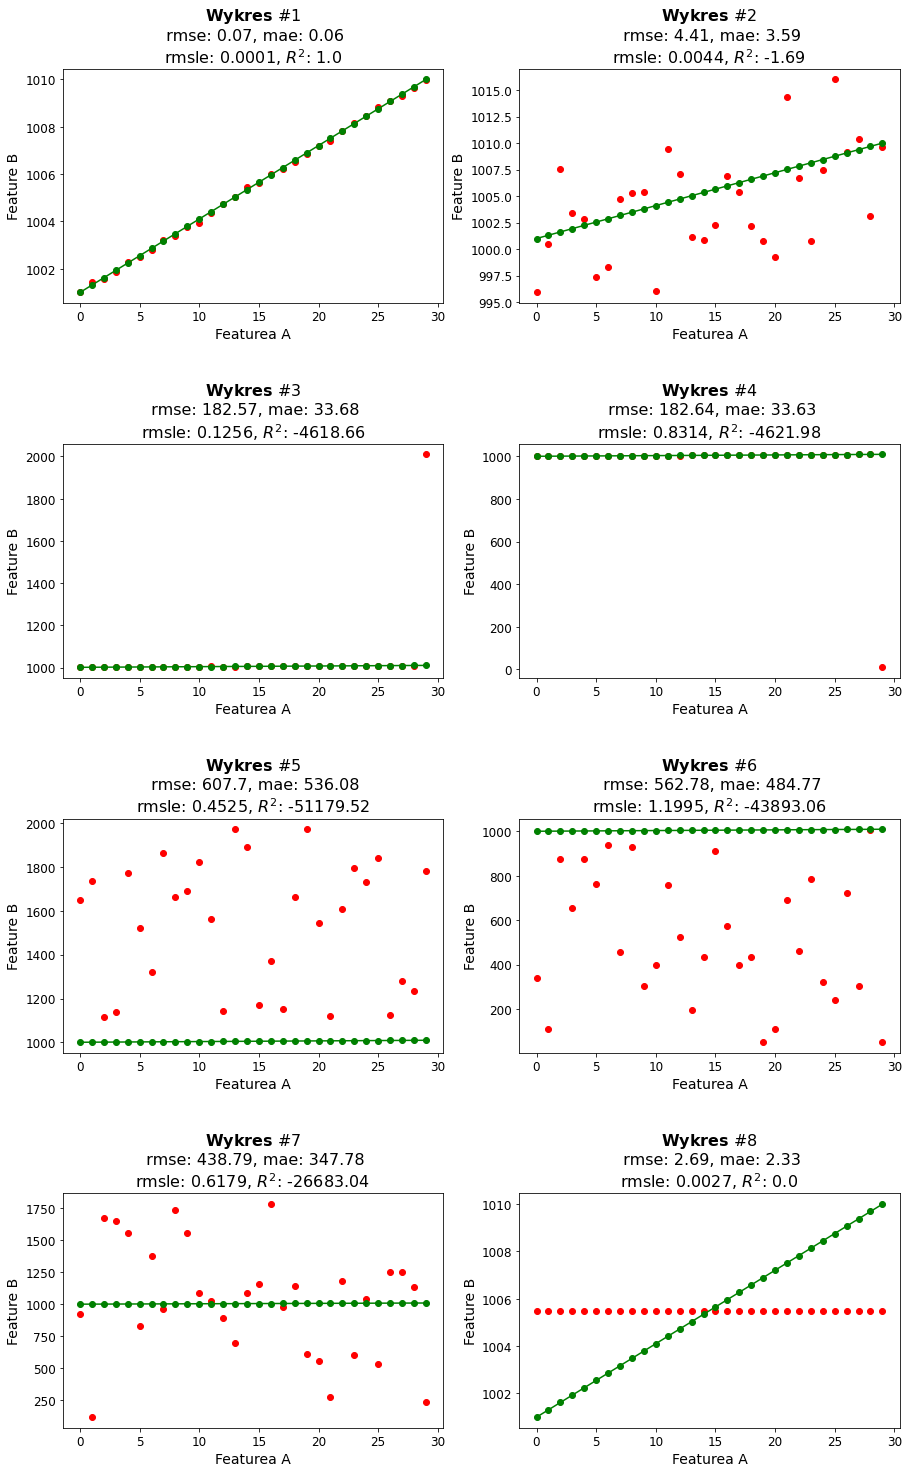

In [4]:
h.plot_more_metric_cases()

## Podsumowanie
Każda metryka ma swoją specyfikę, przyjrzyj się dokładniej tej tablicy, która jest podsumowaniem poprzednich eksperymentów.

|  attribute     | mae        | rmse       | rmsle     | $R^2$       |
|----------------|------------|------------|-----------|-------------|
|input range     |(-inf, +inf)|(-inf, +inf)|[1, +inf)  |(-inf, +inf) |
|output range    |[0, +inf)   |[0, +inf)   |[0, +inf)  |(-inf, 1] |
|ideal value     | 0          |0           |0          |1            |
|outliers penalty|linear      |qudratic    |exp and log|quadratic    |
|measurement unit|target var. | target var.|target var.|no unit      | 
|symetric        |yes         |yes         |no         |yes          |


### MAE vs (R)MSE

Kiedy użyć której? Jak to zwykle bywa w życiu, nie ma jednej rady. Dlatego zwykle odpowiedź brzmi: "to zależy".

#### MAE
- **Zalety** - jest mniej czuła na wartości odstające (ang. outliers), dzięki czemu nie próbuje za wszelką cenę zminimalizować jednego błędu. Również jest prosta (liniowa) w interpretacji.
- **Wady** - przede wszystkim z punktu widzenia matematyki nie ma pochodnej w punkcie 0, również nie ma drugiej pochodnej. To oznacza, że wszystkie algorytmy oparte na tym (czyli prawie wszystkie, które obecnie są używane w praktyce) przestają działać. Są pewne triki, które pomagają sobie z tym radzić. Na przykład w punkcie zero, zamiast funkcji liniowej, można użyć funkcji kwadratowej albo znaleźć funkcję która działa podobnie, ale ma pierwszą i drugą pochodną.

#### RMSE
- **Zalety** - ma pierwszą i drugą pochodną :) Całkiem fajnie działa w przypadku, kiedy rozkład błędów jest normalny (definicja książkowa) lub jeśli w tym rozkładzie jest jakaś w miarę sensowna losowość (definicja w praktyce), czyli bez ekstremalnych wartości odstających.

- **Wady** - bardzo kiepsko sobie radzi, gdy są (zauważalne) wartości odstające. Wtedy metryka próbuje wszystko postawić na jedną kartę, aby tylko zminimalizować ten jeden błąd. Są pewne triki, które pomagają sobie z tym radzić. Na przykład, można zrobić transformację logarytmiczną, wtedy problem z wartościami odstającymi częściowo rozwiązuje się (ale w praktyce nie zawsze jest to takie łatwe).

## Klasyfikacja

Posiada szereg swoich metryk. Najpierw weźmiemy najprostszy rodzaj klasyfikacji - klasyfikację binarną. Istnieją tutaj dwie możliwe odpowiedzi, np. 0 lub 1, tak lub nie, pies czy kot, itd.

Przy metrykach związanych z klasyfikacją bardzo często pojawia się tzw. tablica pomyłek (ang. *[confusion matrix](https://bit.ly/3drz1Jl)*).

Posiada ona dwa wymiary. Pierwszy wymiar - wartości prawidłowe, drugi wymiar - predykcje modelu. To oznacza, że jest kwadrat 2x2, czyli 4 możliwe przypadki.

Dla przykładu weźmiemy klasyfikację: pies czy kot (załóżmy, że dla modelu pies będzie oznaczany jako 1, a kot jako 0).

Możliwe scenariusze:
1. Faktycznie był pies i model "powiedział", że to pies - ten przypadek nazywa się **True Positive** (TP), ponieważ prawdziwa wartość była 1 i model przewidział 1.
2. Faktycznie był kot i model "powiedział", że to kot - ten przypadek nazywa się **True Negative** (TN), ponieważ prawdziwa wartość była 0 i model przewidział 0.

W dwóch przypadkach pierwsze słowo brzmi **True** czyli prawda. Mówi ono o tym, że nasz model podał poprawną wartość.

Drugie słowo mówi, jaką klasę wskazał. Pierwsza klasa to **Positive**, a druga **Negative**. W tym przypadku może to być trochę mylące, bo to czy pies jest "positive" czy kot nie ma żadnego znaczenia. W praktyce najczęściej bada się "obecność" lub "brak" danej rzeczy np. choroby. Wtedy nazewnictwo positive/negative już jest bardziej intuicyjne.

Łatwo się domyślić, że dwa pozostałe przypadki będą analogiczne. Tylko zamiast **True** będzie **False**, co będzie oznaczało, że nasz model podał niepoprawną wartość.

3. Faktycznie był kot, ale model wykrył psa - **False Positive** (FP), ponieważ prawdziwa wartość była 0 i model przewidział 1. 
4. Faktycznie był pies, ale model wykrył kota - **False Negative** (FN), ponieważ prawdziwa wartość była 1 i model przewidział 0.

W większości przypadków, bazując na tych czterech liczbach, powstają najważniejsze metryki dla klasyfikacji.

Dobra, to już wiesz, jak można kombinować z odpowiedziami (ilość psów czy kotów), przechodzimy do zabawy.

In [6]:
DOG = 1
CAT = 0

y_true = [DOG]*3 + [CAT]*5

### Przypadek 1
Model wykrył wszystkie psy kosztem większości kotów.

In [7]:
y_pred = [DOG]*7 + [CAT]*1

h.calc_classification_metrics(y_true=y_true, y_pred=y_pred )

y_true: [1, 1, 1, 0, 0, 0, 0, 0]
y_pred: [1, 1, 1, 1, 1, 1, 1, 0]

precision_score: 0.42857142857142855
recall_score: 1.0
f1_score: 0.6
accuracy_score: 0.5
specifity_score: 0.2
f_beta_1: 0.6
f_beta_2: 0.7894736842105262
f_beta_3: 0.8823529411764707
f_beta_4: 0.9272727272727272


confusion_matrix
[[1 4]
 [0 3]]


classification_report
              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.43      1.00      0.60         3

    accuracy                           0.50         8
   macro avg       0.71      0.60      0.47         8
weighted avg       0.79      0.50      0.43         8



### Przypadek 2
Model wykrył wszystkie koty kosztem większości psów.

In [8]:
y_pred = [DOG]*1 + [CAT]*7 

h.calc_classification_metrics(y_true=y_true, y_pred=y_pred )

y_true: [1, 1, 1, 0, 0, 0, 0, 0]
y_pred: [1, 0, 0, 0, 0, 0, 0, 0]

precision_score: 1.0
recall_score: 0.3333333333333333
f1_score: 0.5
accuracy_score: 0.75
specifity_score: 1.0
f_beta_1: 0.5
f_beta_2: 0.3846153846153846
f_beta_3: 0.3571428571428571
f_beta_4: 0.3469387755102041


confusion_matrix
[[5 0]
 [2 1]]


classification_report
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.33      0.50         3

    accuracy                           0.75         8
   macro avg       0.86      0.67      0.67         8
weighted avg       0.82      0.75      0.71         8



### Przypadek 3
Model wykrył większość kotów i psów.

In [9]:
y_pred = [DOG]*2 + [CAT]*1 + [DOG]*2 + [CAT]*3

h.calc_classification_metrics(y_true=y_true, y_pred=y_pred )

y_true: [1, 1, 1, 0, 0, 0, 0, 0]
y_pred: [1, 1, 0, 1, 1, 0, 0, 0]

precision_score: 0.5
recall_score: 0.6666666666666666
f1_score: 0.5714285714285715
accuracy_score: 0.625
specifity_score: 0.6
f_beta_1: 0.5714285714285715
f_beta_2: 0.625
f_beta_3: 0.6451612903225805
f_beta_4: 0.6538461538461539


confusion_matrix
[[3 2]
 [1 2]]


classification_report
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.50      0.67      0.57         3

    accuracy                           0.62         8
   macro avg       0.62      0.63      0.62         8
weighted avg       0.66      0.62      0.63         8



Proszę sprawdź kilka innych przypadków zmieniając proporcje kotów czy psów. Na przykład można zrobić tak, że jest tylko jeden kot na 20 przypadków w ten sposób:

```
y_true = [DOG]*19 + [CAT]*1
y_pred = [CAT]*19 + [DOG]*1

h.measure_quality(y_true=y_true, y_pred=y_pred )
```

In [10]:
y_true = [DOG]*1 + [CAT]*19
y_pred = [DOG]*19 + [CAT]*1

h.calc_classification_metrics(y_true=y_true, y_pred=y_pred )

y_true: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_pred: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]

precision_score: 0.05263157894736842
recall_score: 1.0
f1_score: 0.1
accuracy_score: 0.1
specifity_score: 0.05263157894736842
f_beta_1: 0.1
f_beta_2: 0.21739130434782608
f_beta_3: 0.35714285714285715
f_beta_4: 0.48571428571428565


confusion_matrix
[[ 1 18]
 [ 0  1]]


classification_report
              precision    recall  f1-score   support

           0       1.00      0.05      0.10        19
           1       0.05      1.00      0.10         1

    accuracy                           0.10        20
   macro avg       0.53      0.53      0.10        20
weighted avg       0.95      0.10      0.10        20



## Historia 1

Załóżmy, że wybuchła epidemia, którą potrafią przenosić tylko koty :). Akurat w ośrodku dla psów, nie powinno to być groźne, bo nie ma tam kotów... Ale w życiu bywa to różnie. Dlatego mamy robota, który monitoruje i czuwa nad sytuacją.

Gdy model pokaże, że znaleziono kota od razu zapalają się czerwone lampki i wszyscy biegną sprawdzić, co się dzieje. Po weryfikacji okazało się jednak, że model pomylił się i tak naprawdę to był pies (a pies, jak wiadomo z założenia, nie przenosi tej magicznej choroby). Wszyscy narzekają "znów to samo, musimy coś z tym zrobić itd.". Mówi się na to - **False Positive** albo też **False Alarm**. Statystycy nazwą to - `Error I` czyli błąd typu pierwszego.

Sytuacja odwrotna do przytoczonej jest wtedy, kiedy jednak kotek się pojawił i model go nie wykrył (czyli pomylił go ze psem). W wyniku tego wszystkie psy zdechły (razem z kotem) :( Na szczęście w toku pisania tej powieści żadne psy ani koty nie ucierpiały. Wtedy mówimy, że "przegapiliśmy coś ważnego" lub **False Negative**. Statystycy nazwą to - `Error II` czyli błąd typu drugiego.

W tym przypadku ważne jest, żeby uniknąć mylenia kota z psem i tym samym uratować życie wszystkich psów (nawet jeśli to będzie kosztem **False Alarm/False Positive**).
Naturalnym będzie również założyć wykrycie choroby (kota) jako **True Positive**. 

Zależy nam bardzo na tym, żeby uniknąć **False Negative** (maksymalna koncentracja na rozpoznanie kotów). Na pomoc przychodzi `recall` (lub `sensitivity`), która jest równa 100% wtedy i tylko wtedy, gdy rozpoznawanie kotów jest 100%.

Swoją drogą, model zawsze może zacząć mówić, że wszyscy nagle są kotami. Wtedy na pewno nie przegapimy kota. Pytanie tylko, czy ilość **False Alarm** nie spowoduje jeszcze większych problemów.

**Uwaga!** W tym przypadku, kot jest w lewym górnym rogu kwadratu (więc `CAT=1`), a pies w prawym dolnym rogu kwadratu (więc `DOG=0`). 

## Historia 2

Bank ma wiele wyzwań... jedno z nich to walka z oszustwami. Gdy transakcja zostaje zlecona, bank musi podjąć decyzję, czy jest to transakcja zlecona przez właściciela karty. Jeśli jest to oszustwo, to bank, klient lub oboje tracą pieniądze. Każdy ze scenariuszy jest zły dla banku. Z drugiej strony, jeśli bank będzie blokować każdą transakcję, to wprawdzie każdy oszust zostanie zablokowany, ale również każdy normalny użytkownik. Tylko po co nam taki bank?

Na chwilę zmienię wątek. Przypomniało mi się szkolenie z bezpieczeństwa, kiedy prowadzący zapytał: "Która skrzynka mailowa jest najbezpieczniejsza?". Były różne propozycje ze strony uczestników np. Gmail czy bardziej popularny pod tym kątem szwajcarski [Protonmail](https://bit.ly/31GBZVa) itd. ... Prowadzący poczekał chwilę, aż skończyły się pomysły. Wtedy powiedział: "najbardziej bezpieczna skrzynka mailowa to taka, której nie ma, wtedy na pewno nikt tam się nie włamie. W innych przypadkach to tylko kwestia czasu i kosztu" :).

Wracamy do naszego banku i walki z oszustami. Oczywiście bank może zablokować wszystkie transakcje, będzie super bezpiecznie, tylko z takiego banku nikt nie chciałby korzystać.

W tym przypadku naturalnym będzie uznać, że nie wykrycie oszustwa to będzie **False Negative** (pamiętaj słowa kluczowe **przegapić coś**, to wtedy FN), a zablokowana transakcja właściciela to będzie **False Alarm** lub **False Positive**. Bank bardzo chce unikać **False Alarm**, bo inaczej klienci uciekną. Dlatego robi to nawet kosztem "przegapienia" oszustw.

W tym przypadku na pomoc przychodzi `precision`. Bo ona jest równa 100% wtedy, gdy **False Alarm** wynosi zero.

## f1-score

Czasami spotkamy się z sytuacją, w której ważne jest zarówno `recall` jak i `precision`. W takiej sytuacji przydatne będzie `f1-score`, które jest [średnią harmoniczną](https://bit.ly/3cFIFJk) między `recall`, a `precision`:

$f_1score = 2* \frac{recall * precision}{recall+precision}$


Dlaczego średnia harmoniczna zamiast zwykłej? W tym przypadku lepiej pasuje, bo średnia harmoniczna "bardziej" karze, jeśli któraś metryka jest słaba. Innymi słowy, `f1-score` będzie dobry wtedy, kiedy `precision` oraz `recall` są dobre. 

Sprawdźmy to na przykładzie. 

W przypadku średniej normalnej (średnia arytmetyczna) mogła być taka anomalia: `precision=100%`, `recall=2%`, razem będzie `(100 + 2) / 2 = 51%`, co brzmi dość dobrze.

W przypadku średniej harmonicznej mamy tak: `2* (2 * 100) / (2 + 100) = 3,92` (jest różnica w porównaniu do 51%).

## Historia 3
W obecnych czasach bardzo popularna jest autoryzacja biometryczna (odcisk palca, głos, twarz itd.). Z dużym prawdopodobieństwem Twój smartfon/tablet/laptop ma możliwość takiej autoryzacji, a jeśli nie, to zapewne znasz kogoś, kto takie urządzenie posiada :).

Autoryzacja biometryczna oczywiście nie jest doskonała i nie zawsze potrafi rozpoznać osobę. Jeżeli po wykonaniu skanu nie ma pewności, czy to jest właściwa osoba, to lepiej, żeby pojawiła się wiadomość "autoryzacja nie powiodła się" (i wtedy poprosić o pin/hasło albo inną formę autoryzacji), niż aby została zautoryzowana niewłaściwa osoba. W takiej sytuacji będziemy chcieli maksymalizować **True Negative** i minimalizować **False Positive**.

Do takiego celu przyda nam się `specificity`, które jest równa 100% wtedy i tylko wtedy, gdy **True Negative** rozpozna wszystkie osoby, które nie powinny otrzymać autoryzacji.

## ROC Curves
[Receiving Operating Characteristic](https://bit.ly/3fyML7Z) lub ROC - wizualna interpretacja jakości modelu dla binarnej klasyfikacji.

Legenda głosi, że ROC został wymyślony podczas wojny, kiedy radar miał odróżnić samolot od szumu (np. stado gęsi).

Myśl o krzywej ROC jako o suwaku, który umożliwia podjęcie kompromisowej decyzji.

Jak to bywa w życiu, zawsze jest "coś za coś" i zgadzasz się na to, natomiast chcesz mieć kontrolę nad tym, czego będzie więcej.

Zanim jednak przejdziemy do wykresów, warto zrozumieć, czym są:
- **True Positive Rate** (który jest tożsamy z opisanym wcześniej `recall`)
- **False Positive Rate**

### Uwaga!
**ROC Curves** pokazują, jak dobrze model potrafi oddzielić od siebie klasy pozytywne i negatywne i jednocześnie znaleźć najlepszy kompromis, żeby je rozdzielić. Pamiętaj, że w przypadku klasyfikacji binarnej model (dość często) zwraca wartość pomiędzy 0 a 1, np. 0.45 lub 0.55 (zamiast jednoznacznej odpowiedzi). Dlatego trzeba podjąć decyzję, w którym miejscu postawimy granicę. Na przykład wszystko poniżej 0.5 zostanie przypisane do klasy pierwszej, a reszta do klasy drugiej. Czasem świadomie przesuwamy granicę w jedną lub drugą stronę, np. wszystko poniżej 0.6 zostanie przypisane do klasy pierwszej, a reszta do klasy drugiej.


## Historia 4
Czy wiesz, że w wielu miastach są już bitomaty, gdzie można kupić bitcoiny? To oznacza, że bitcoin naprawdę stał się popularny i być może z tego powodu podejmiesz decyzję, żeby rzucić wszystko i wejść w temat inwestycji. Czemu nie? Oczywiście chcesz to zrobić rozsądnie i użyć np. Machine Learning.

Chcesz nauczyć się zgadywać, kiedy kupować i sprzedawać (bo to jest najbardziej istotne pytanie)? Jeśli kupisz w odpowiednim momencie, to nagle pieniądze przestaną Cię martwić i możesz pójść dalej, zastanowić się na sensem życia... Ale na razie wróćmy do tematu - jak przewidzieć dobry moment na kupno. 

**False Negative** w tym przypadku będzie straconą okazją, czyli model stwierdził, że po tym jak chiński rząd ogłosił krach bitcoina to wzrostu nie będzie, a on jednak był...

**False Positive/Alarm** w tym przypadku będzie to sytuacja, kiedy model stwierdził - kupuj, na pewno zarobisz, ale następnego dnia wartość spadła o połowę. Dość smutna wiadomość (zwłaszcza jeśli pieniądze były z kredytu).

**True Positive Rate (TPR)** albo `recall` to jest stosunek, kiedy z jednej strony liczymy, ile razy kupiliśmy w odpowiednim momencie, ale dzielimy przez sumę zarówno wykorzystanych, jak i straconych okazji. Innymi słowy: TPR będzie 100% tylko wtedy, gdy straconych okazji będzie zero.

**False Positive Rate (FPR)** to jest stosunek, kiedy liczymy liczbę błędnych sugestii kupna (model powiedział kupuj, będzie dobrze, a było źle, czyli False Alarm) i dzielimy ją przez wszystkie przypadki, kiedy NIE należało kupić. Innymi słowy dzielimy przez sumę błędnych sugestii kupna jak i prawidłowych sugestii "nie-kupna" (model powiedział nie kupuj i to była dobra sugestia). W tym przypadku, chcielibyśmy minimalizować ilość błędnych sugestii kupna (**False Alarm**). Idealna dla nas wartość FPR to 0%, czyli kiedy model ani razu nie powie "kupuj", kiedy nie należało tego robić.

(Jeśli po przeczytaniu powyższych opisów nadal nie do końca czujesz, czym jest FPR, a czym TPR, to kilka komórek niżej przygotowałem wersję graficzną)

Dobra, to teraz przechodzimy do wykresów.
- Na osi x jest **False Positive Rate**
- Na osi y jest **True Positive Rate**

Zaczniemy od idealnego przypadku, kiedy jednocześnie **FPR=0%** i **TPR=100%** (ang. *Area Under the ROC Curve* - AUC 1.0).

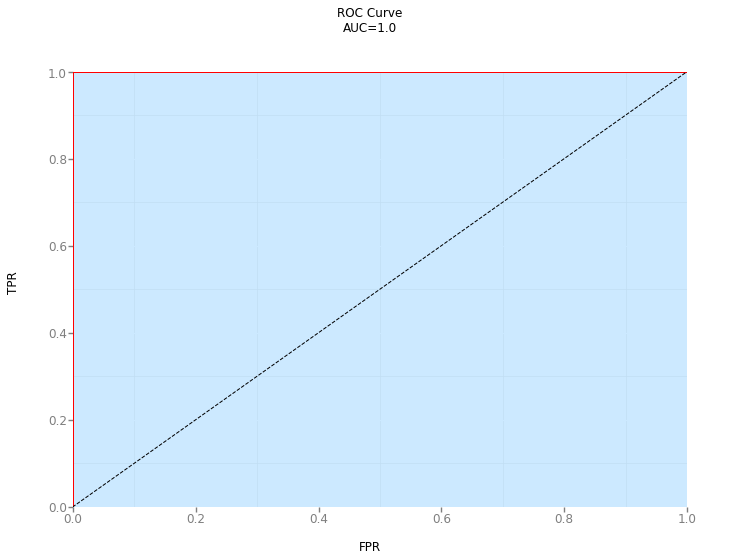

<ggplot: (8771326427600)>

In [11]:
h.plot_roc_auc([1]*20 + [0]*80, [1]*20 + [0]*80)

## Zgadywanie - AUC=0.5

Jeśli AUC jest równy 0.5, to równie dobrze możemy rzucać monetą. Jeśli jest mniej niż 0.5, to wtedy trzeba wyrzucić taki model albo postąpić bardziej kreatywnie i "odkręcić" wynik, żeby osiągnąć coś ponad 0.5 (np. możemy  odwrócić odpowiedź modelu do góry nogami - kiedy mówi 0, rozumiem to jako 1 i na odwrót).

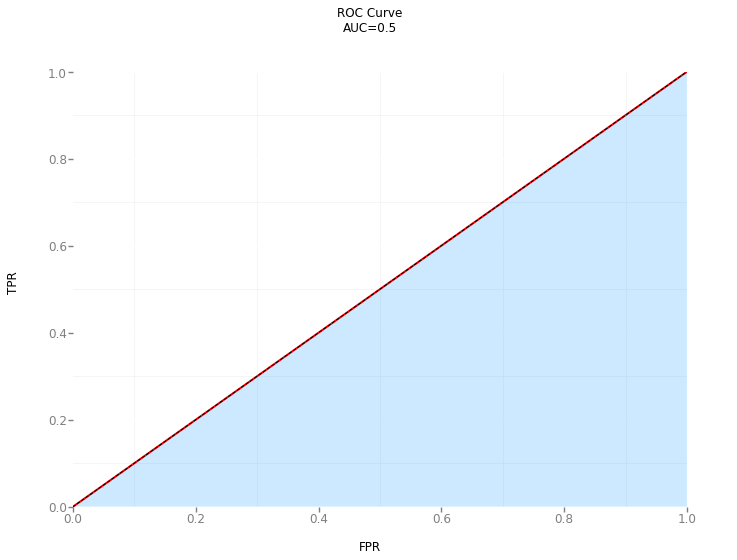

<ggplot: (8771326779941)>

In [12]:
np.random.seed(1)
h.plot_roc_auc([1]*20 + [0]*80, np.random.randint(2, size=100))

## AUC mniej niż 0.5

Model daje gorszy wynik niż rzucanie monetą. Już opisałem wyżej, co z tym można zrobić.

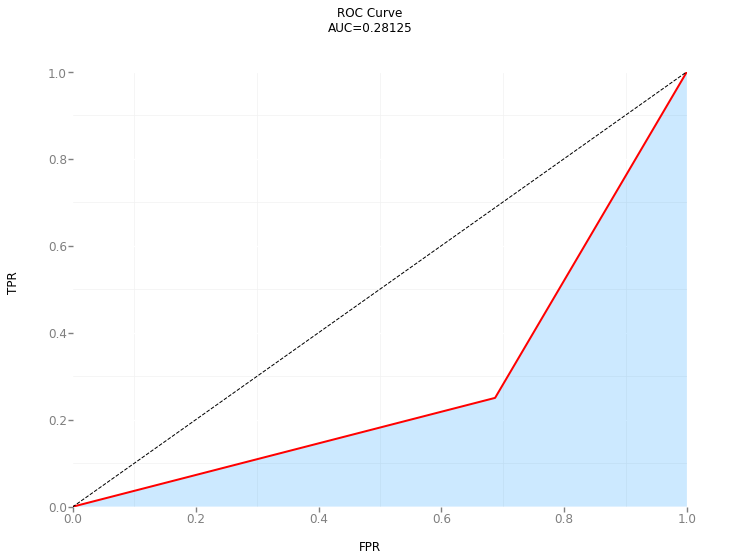

<ggplot: (8771326760081)>

In [13]:
h.plot_roc_auc([1]*20 + [0]*80, [1]*5 + [0]*40 + [1]*55)

## Confusion Matrix

Metryki dla klasyfikacji dość często potrafią wprowadzić zamieszanie... W sumie dlatego wymyśliłem trzy historie (dostępne powyżej), żeby to potraktować jako zabawę.

Natomiast nadal może to być trudne chociażby dlatego, że w `sklearn` **confusion matrix** jest odwrócona.

Przygotowałem specjalnie dla Ciebie ściągawkę :).

![](../images/content_confusion_matrix.png)

Wartości w tym kwadracie można obracać. Na przykład w `sklearn` obecna jest druga wersja, kiedy to na górze są wartości z modelu, a po lewej wartości prawdziwe (czyli na odwrót niż teraz). Wtedy również TP i TN wymieniają się miejscami. Dlatego ta tabelka w wynikach `sklearn` będzie wyglądać trochę inaczej.

Porównajmy:

![](../images/content_sklearn_other.png)

Osobiście preferuję ten po prawej stronie. Jest dla mnie bardziej intuicyjny, ale to też może być kwestia przyzwyczajenia. 

Polecam wybrać któryś i trzymać się go. Dlaczego? Bo potem łatwiej wyprowadzać wzory z pamięci. Na przykład, dla mnie `precision`, to lewy górny róg (TP) przez sumę górnego wiersza (TP + FP) i pamiętam to wzrokowo, albo `recall`, to lewy górny róg (TP) przez sumę lewej kolumny (TP + FN).

Jeśli nadal potrzebujesz więcej przykładów z ROC oraz AUC, to proszę obejrzyj film poniżej (jest po angielsku).

In [1]:
%%html
<iframe width="100%" height="500" src="https://bit.ly/3mi8lPh" frameborder="0" allowfullscreen></iframe>

## Classification report

Dodatkowo można zobaczyć raport z najważniejszymi metrykami w jednym miejscu: `precision`, `recall`, `f1-score`, `accuracy` oraz `support` (liczba obiektów należących do tej klasy). W tym przypadku mamy 1280 obiektów `class=0` oraz 1220 `class=1`.

In [15]:
X, y = make_classification(n_samples=10000, n_features=10, n_classes=2, n_informative=2)


X_train, X_test, y_train, y_test = train_test_split(X, y)
model=LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1276
           1       0.87      0.89      0.88      1224

    accuracy                           0.88      2500
   macro avg       0.88      0.88      0.88      2500
weighted avg       0.88      0.88      0.88      2500



## Liniowa regresja i AUC

Wygenerujemy przykładowy zbiór danych (wykorzystując do tego funkcję `make_classification`), następnie użyjemy `LogisticRegression` jako modelu, żeby pokazać kształt ROC krzywej "z życia" wzięty.

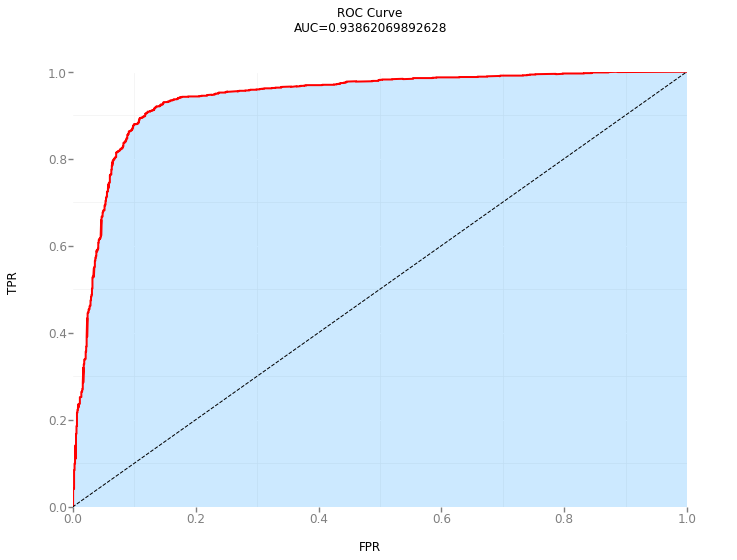

<ggplot: (8771326630919)>

In [16]:
def build_model_and_predict(X_train, X_test, y_train, model=LogisticRegression()): 
    model.fit(X_train, y_train)
    return model.predict_proba(X_test)[:,1]

X, y = make_classification(n_samples=10000, n_features=10, n_classes=2, n_informative=2)
X_train, X_test, y_train, y_test = train_test_split(X, y)

y_pred = build_model_and_predict(X_train, X_test, y_train)
h.plot_roc_auc(y_test, y_pred)

Brdzo gorąco polecam skorzystać z tej [strony](https://bit.ly/2OerhBY), żeby lepiej wyczuć ROC krzywą i AUC na poziomie intuicji (strona jest interaktywna, proszę przesuwać suwaczek).

## Przydatne linki:
- [Performance Metrics for Classification problems in Machine Learning](https://bit.ly/31FpYz1)
- [Precision, recall i F1 – miary oceny klasyfikatora](https://bit.ly/39zjjuC)
- [Krzywa Precision-Recall jak ją wykreślić i zinterpretować](https://bit.ly/3sKmW8P)
- [Sensitivity and Specificity Explained Clearly (Biostatistics)](https://bit.ly/2PjONOF)
- [Performance Metrics for Classification problems in Machine Learning](https://bit.ly/31FpYz1)
- [Know the Difference Between Your Data and Your Metrics](https://bit.ly/3wiYqO1)
- [AI can be sexist and racist — it’s time to make it fair](https://bit.ly/3cHX33z)
- [MAE and RMSE — Which Metric is Better?](https://bit.ly/3cOd2xr)
- [How Should We Evaluate Machine Learning for AI?: Percy Liang](https://bit.ly/3cJhzB7)
- [Robust nonlinear regression in scipy](https://bit.ly/31JaKct)
- [All models are wrong](https://bit.ly/31D0W3A)
- [Confusion matrix](https://bit.ly/39xxQqI)
- [Precision and recall](https://bit.ly/3woEFof)
- [An introduction to ROC analysis - paper](https://bit.ly/3rFhW3X)
- [The Relationship Between Precision-Recall and ROC Curves - paper](https://bit.ly/39BF3Gc)
- [ROC Curves](https://bit.ly/31Ed0BR)